In [1]:
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

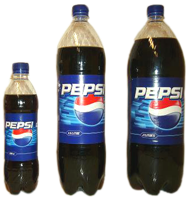

In [2]:
results = search_images_ddg('pepsi bottle or can photo jpg', max_images=5)
pepsiImg = results[0]

pepsiImgDest = 'images/pepsi.jpg'
#print(pepsiImgDest)
download_url(pepsiImg, pepsiImgDest)

im = Image.open(pepsiImgDest)
im.to_thumb(200,200)

https://images.heb.com/is/image/HEBGrocery/001347846


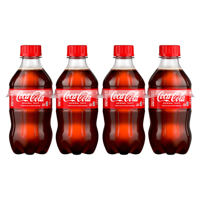

In [49]:
results = search_images_ddg('coca cola bottle or can photo jpg', max_images=5)
cokeImg = results[1]

cokeImgDest = 'images/coke.jpg'
#print(cokeImg)
download_url(cokeImg, cokeImgDest)

im = Image.open(cokeImgDest)
im.to_thumb(200,200)

In [53]:
drink_types = 'coca cola','pepsi'
path = Path('soft_drinks')

if not path.exists():
    path.mkdir()
    for o in drink_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} bottle or can product photo jpg', max_images=300)
        download_images(dest, urls=results)

fns = get_image_files(path)
print(f'fns: {len(fns)}')
failed = verify_images(fns)
print(f'fns: {len(failed)}')


fns: 497
fns: 38


In [54]:
failed.map(Path.unlink)

(#38) [None,None,None,None,None,None,None,None,None,None...]

In [55]:
len(get_image_files(path))

459

In [72]:
drinksDataBlock = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

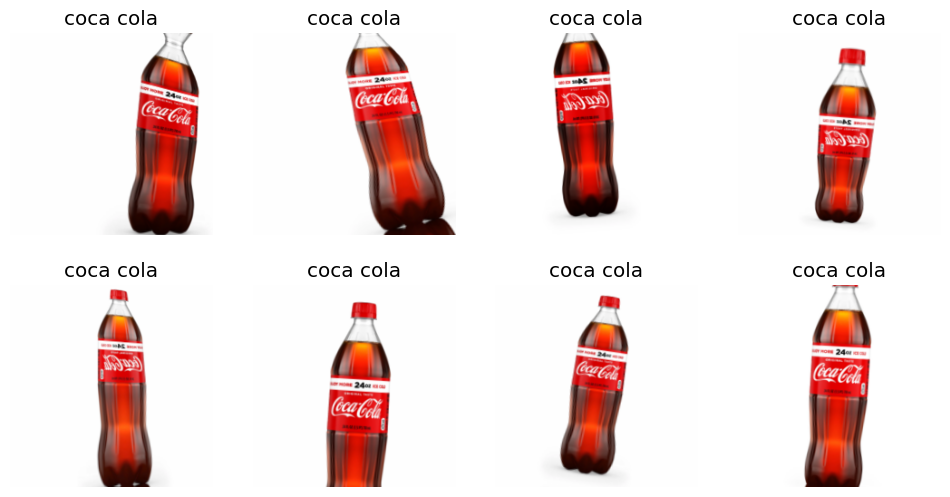

In [73]:
drinksDataBlock = drinksDataBlock.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = drinksDataBlock.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [75]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.146588,0.415128,0.195122,00:09


/home/zwb1988/miniconda3/lib/python3.12/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/zwb1988/miniconda3/lib/python3.12/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/zwb1988/miniconda3/lib/python3.12/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/zwb1988/miniconda3/lib/python3.12/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/zwb1988/miniconda3/lib/python3.12/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/zwb1988/miniconda3/lib/python3.12/site-packa

epoch,train_loss,valid_loss,error_rate,time
0,0.433959,0.217151,0.073171,00:09
1,0.327491,0.185693,0.060976,00:08
2,0.256746,0.201711,0.060976,00:08
3,0.232366,0.199810,0.060976,00:08


/home/zwb1988/miniconda3/lib/python3.12/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/zwb1988/miniconda3/lib/python3.12/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/zwb1988/miniconda3/lib/python3.12/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/zwb1988/miniconda3/lib/python3.12/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/zwb1988/miniconda3/lib/python3.12/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/zwb1988/miniconda3/lib/python3.12/site-packa

/home/zwb1988/miniconda3/lib/python3.12/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/zwb1988/miniconda3/lib/python3.12/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/home/zwb1988/miniconda3/lib/python3.12/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/zwb1988/miniconda3/lib/python3.12/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


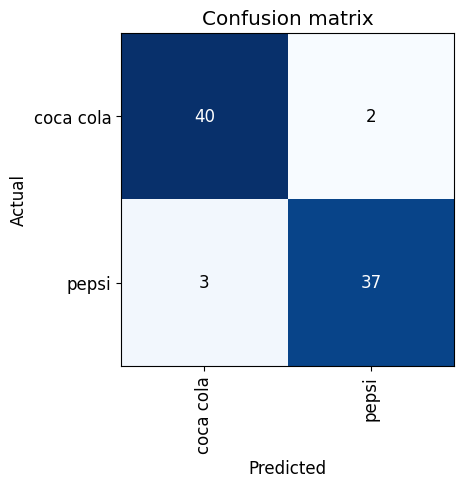

In [76]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

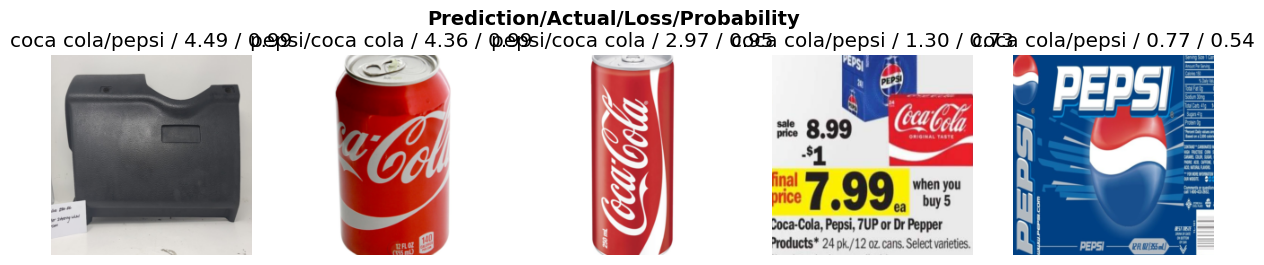

In [77]:
interp.plot_top_losses(5, nrows=1)

In [78]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/home/zwb1988/miniconda3/lib/python3.12/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/zwb1988/miniconda3/lib/python3.12/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/zwb1988/miniconda3/lib/python3.12/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/home/zwb1988/miniconda3/lib/python3.12/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/zwb1988/miniconda3/lib/python3.12/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [68]:
print(len(cleaner.delete()))
#for idx in cleaner.delete(): cleaner.fns[idx].unlink()

print(len(cleaner.change()))
#for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)
print('done')

3
0
done


In [79]:
learn.export()

In [80]:
path = Path()
print(path.ls(file_exts='.pkl'))
learn_inf = load_learner(path/'export.pkl')

[Path('export.pkl')]


In [83]:
# list all the available labels
print(learn_inf.dls.vocab)

['coca cola', 'pepsi']


In [92]:
#test predict
pred,pred_idx,probs = learn_inf.predict('images/pepsi.jpg')

pred_lbl = widgets.Label()
pred_lbl.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
pred_lbl


Label(value='Prediction: pepsi; Probability: 1.0000')

In [94]:
upload_btn = widgets.FileUpload()
classify_btn = widgets.Button(description='Classify')
output = widgets.Output()
#out_pl.clear_output()
pred_lbl = widgets.Label()

def on_click_classify(change):
    uploadedImg = PILImage.create(upload_btn.data[-1])
    output.clear_output()
    with output: display(uploadedImg.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(uploadedImg)
    pred_lbl.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

classify_btn.on_click(on_click_classify)


VBox([widgets.Label('Select your drink (Pep or Coke)...'), 
      upload_btn, classify_btn, output, pred_lbl])